In [1]:
# this imports all packages
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Import data

In [2]:
# reads in the CSV with pandas
df = pd.read_csv('results_2021.csv', header=1)

In [3]:
# limit to rows with valid serial numbers
df = df[df['Serial #'] > 0]
print(df.shape)

(1141, 246)


In [4]:
# limit to rows with multiple employees
df = df[df['Sample Qualification'] == '2+ employees']
print(df.shape)

(932, 246)


In [5]:
# get list of column headers
keys = np.array(list(df.keys()))

## Map from question numbers to columns

In [6]:
# following https://github.com/todogroup/osposurvey/blob/master/2021/questions.md
parts_to_qs = {
    '1': [1,2,3,4,5,6],
    '2a': [7,8],
    '2b': [9],
    '2c': [10,11,12,13,14,15,16,17,18,19,20],
    '2d': [21],
    '3': [22,23,24,25,26],
    '4a': [27,28],
    '4b': [29,30],
    '4c': [31],
    '5a': [32,33,34,35,36,37],
    '5b': [38],
    '5c': [39],
    '6': [40,41,42],
    '7': [43,44,45,46,47],
    '8': [48,49,50]
}

In [7]:
qs_to_cols = {
    1: [8,9,10,11,12,13,14],
    2: [15],
    3: [16,17,18,19,20,21,22],
    4: [23],
    5: [24,25,26,27,28],
    6: [29],
    7: [30,31,32,33,34,35,36,37,38,39,40],
    8: [41],
    9: [42],
    10: [43,44],
    11: [45,46,47,48,49,50],
    12: [51,52],
    13: [53],
    14: [54],
    15: [55,56,57,58,59,60,61,62,63,64,65,66,67,68,69],
    16: [70,71,72,73,74,75,76,77,78,79,80,81,82,83,84],
    17: [85,86,87,88,89,90,91,92,93,94,95],
    18: [96],
    19: [97],
    20: [98],
    21: [99,100],
    22: [101],
    23: [102],
    24: [103,104],
    25: [105,106,107,108,109,110,111,112,113,114,115,116,117,118,119],
    26: [120,121,122,123,124,125,126,127,128,129,130,132], #131 has no data
    27: [133,134,135,136,137,138,139,140,141,142,143],
    28: [144],
    29: [145],
    30: [146,147,148,149,150,151,152,153,154,155,156,157,158,159,160],
    31: [161,162,163,164,165,166,167,168,169,170],
    32: [171,172,173,174,175,176,177,178,179,180,181],
    33: [182,183,184],
    34: [185,186,187],
    35: [188],
    36: [189,190,191],
    37: [192],
    38: [193],
    39: [194],
    40: [195],
    41: [196],
    42: [197],
    43: [198],
    44: [199, 200],
    45: [201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221],
    46: [222],
    47: [223,224,225,226,227,228],
    48: [229,230,231,232,233,234,235,236,237,238,239,240,241,242,243],
    49: [244],
    50: [245]
}

## Plots

### Helper functions

In [8]:
def remove_nans(c):
    """
    Remove 'nan' from the collections.Counter object (that means it wasn't filled out)
    """
    nans = [k for k in list(c.keys()) if str(k) == 'nan']
    for n in nans:
        del c[n]
    return c

In [9]:
def access_mc_question(q):
    """
    Take question number, and count up response with collections.Counter
    """
    key = keys[qs_to_cols[q]]
    print(key)
    assert len(key) == 1
    c = Counter(df[key[0]])
    return remove_nans(c)

In [10]:
def access_multiple_row_question(q):
    """
    Take question number with multiple columns, and count up number of people who clicked each column
    """
    key = keys[qs_to_cols[q]]
    print(key)
    c = Counter()
    for k in key:
        c += remove_nans(Counter(df[k]))
    return remove_nans(c)

In [11]:
def plot(c, title, order=None, N=None):
    # set order of options in the plot
    preferred_order = order if order else range(len(c.keys()))
    # when plotting percentiles, divide by N
    N = N if N != None else sum(c.values())
    
    options = np.array(list(c.keys()))[preferred_order]
    percentiles = 100* np.array(list(c.values()))[preferred_order] / N

    plt.barh(options, percentiles)
    plt.title(title)
    plt.xlabel(f'percent of respondents (N={N})')
    plt.grid()

### Examples

As compared with https://raw.githubusercontent.com/todogroup/osposurvey/master/2021/results_2021.pdf

2. Number of people at your org

In [12]:
c = access_mc_question(2)
print(c.keys())

['# of People at Organization - Recoded_or_edited']
dict_keys(['More than 10,000', '2-5', '51-250', '1,001-10,000', '251-1,000'])


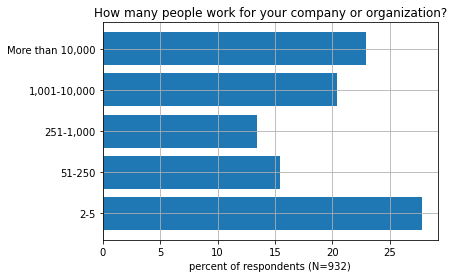

In [13]:
preferred_order = [1,2,4,3,0]
plot(c, 'How many people work for your company or organization?', preferred_order)

49. Category that most defines your role

In [14]:
c = access_mc_question(49)
print(c.keys())

['Multiple choice response.24']
dict_keys(['C-level (non-technology) management', 'IT management, including CIO, CISO, CTO', 'Developer or software engineer', 'Marketing / PR', 'Community manager or developer advocate', 'Other', 'Other IT'])


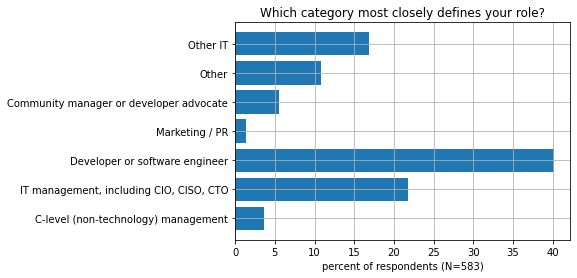

In [15]:
plot(c, 'Which category most closely defines your role?')

50. What industry?

In [16]:
c = access_mc_question(50)
print(c.keys())

['Multiple choice response.25']
dict_keys(['Telecom, communications or media', 'Technology (software or IT)', 'Financial services', 'Education: Other', 'Transportation and automotive', 'Retail', 'Education: University', 'Healthcare', 'Other', 'Manufacturing and raw materials', 'Defense', 'Public Sector: National government', 'Utilities', 'Public Sector: Local government', 'Public Sector: International government', 'Education: For-profit services', 'Insurance', 'Public Sector: Non-governmental organization'])


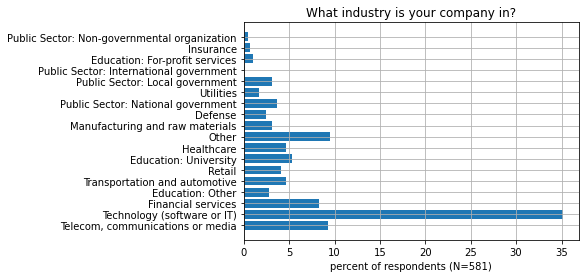

In [17]:
plot(c, 'What industry is your company in?')

1. Where is your company or organization on its open source journey?

In [18]:
c = access_multiple_row_question(1)

['Consuming open source code in products or services'
 'Contributing to upstream open source projects'
 'Influencing open source projects via leadership or maintainer roles'
 'Initiating or releasing open source projects'
 'Collaborating with peers across open source projects and/or foundations'
 'Not involved in open source' "Don't know"]


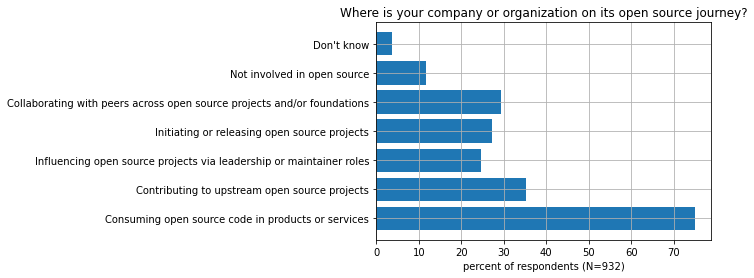

In [19]:
plot(c, 'Where is your company or organization on its open source journey?', N=len(df))